In [279]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
df =  pd.read_csv('df_final.csv')
df.head() 

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,sector,year_established,revenue,employees,office_location,subsidiary_of,series,sales_price,manager,regional_office
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0,retail,2001.0,718.62,2448.0,United States,NaN,GTX,1096,Dustin Brinkmann,Central
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0,medical,2002.0,3178.24,4540.0,United States,NaN,GTX,4821,Melvin Marxen,Central
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0,retail,2001.0,718.62,2448.0,United States,NaN,MG,55,Melvin Marxen,Central
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0,software,1998.0,2714.90,2641.0,United States,Acme Corporation,GTX,550,Dustin Brinkmann,Central
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0,services,1982.0,792.46,1299.0,United States,NaN,GTX,550,Summer Sewald,West


In [281]:
df.columns

Index(['opportunity_id', 'sales_agent', 'product', 'account', 'deal_stage',
       'engage_date', 'close_date', 'close_value', 'sector',
       'year_established', 'revenue', 'employees', 'office_location',
       'subsidiary_of', 'series', 'sales_price', 'manager', 'regional_office'],
      dtype='object')

In [282]:
df = df.dropna()
df = df.drop(columns='sales_price')


df['engage_date'] = pd.to_datetime(df['engage_date'])
df['close_date'] = pd.to_datetime(df['close_date'])
df['anciennete'] = 2024 - df['year_established']

df_encoded = pd.get_dummies(df, columns=['sector'])

features = ['revenue', 'employees', 'anciennete'] + list(df_encoded.filter(like='sector_').columns)
X = df_encoded[features]
y = (df['deal_stage'] == 'Won').astype(int)  # Classification binaire

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [283]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [284]:
# Prédiction des probabilités de succès
X_test['success_score'] = model.predict_proba(X_test)[:, 1]
print(X_test[['success_score']].sort_values(by='success_score', ascending=False).head(10))

      success_score
433        0.733199
3732       0.733199
820        0.733199
5713       0.733199
1495       0.733199
4208       0.733199
1169       0.733199
469        0.733199
145        0.733199
2110       0.733199


In [ ]:
import pandas as pd

# Génération des données
new_deal_data = {
    'revenue': np.random.randint(500, 5000, 50),           
    'employees': np.random.randint(10, 7000, 50),          
    'anciennete': np.random.randint(1, 20, 50),            
#     'sales_price': np.random.randint(100, 5000, 50),       
    'sector_entertainment': np.random.choice([0, 1], 50),  
    'sector_finance': np.random.choice([0, 1], 50),
    'sector_marketing': np.random.choice([0, 1], 50),
    'sector_services': np.random.choice([0, 1], 50),
    'sector_software': np.random.choice([0, 1], 50),
    'sector_technolgy': np.random.choice([0, 1], 50),
    'sector_telecommunications': np.random.choice([0, 1], 50),
}    




new_deal = pd.DataFrame(new_deal_data)

predicted_proba = model.predict_proba(new_deal)[:, 1]
print(f"Probabilité que le deal soit gagné : {predicted_proba[0]:.2%}")

Probabilité que le deal soit gagné : 68.04%


In [ ]:
# y_pred_prob = model.predict_proba(X_test)[:, 1]

predicted_proba_df = pd.DataFrame({'success_score': X_test['success_score']})

print(predicted_proba_df.sort_values(by='success_score', ascending=False).head(10))


      success_score
433        0.733199
3732       0.733199
820        0.733199
5713       0.733199
1495       0.733199
4208       0.733199
1169       0.733199
469        0.733199
145        0.733199
2110       0.733199


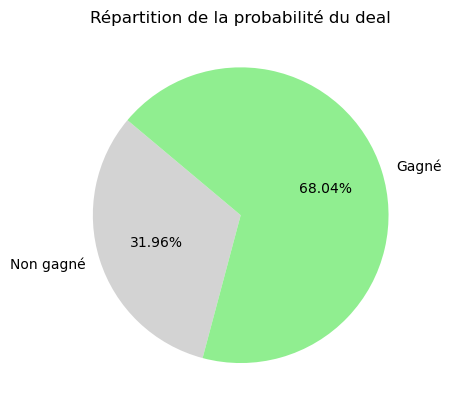

In [304]:
import matplotlib.pyplot as plt

labels = ['Non gagné', 'Gagné']
sizes = [1 - predicted_proba[0], predicted_proba[0]]
colors = ['lightgrey', 'lightgreen']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
plt.title('Répartition de la probabilité du deal')
plt.show()


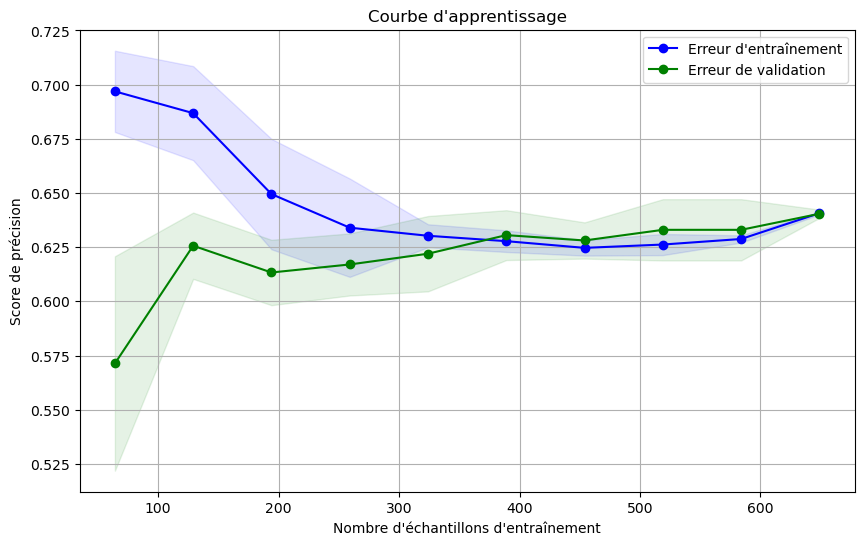

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),  
    cv=5,  
    scoring='accuracy'  
)

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

# Affichage de la courbe
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Erreur d\'entraînement')
plt.plot(train_sizes, val_mean, 'o-', color='green', label='Erreur de validation')

# Tracer les zones d'intervalle de confiance
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='green', alpha=0.1)

plt.title('Courbe d\'apprentissage')
plt.xlabel('Nombre d\'échantillons d\'entraînement')
plt.ylabel('Score de précision')
plt.legend(loc='best')
plt.grid()
plt.show()
